In [51]:
import pandas as pd
import numpy as np

In [52]:
df=pd.read_csv("diamond.csv")
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [53]:
df.shape

(53940, 10)

In [54]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [55]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [56]:
df=df.drop(df[df["x"]==0].index)
df=df.drop(df[df["y"]==0].index)
df=df.drop(df[df["z"]==0].index)
df.shape

(53920, 10)

In [57]:
import seaborn as sns

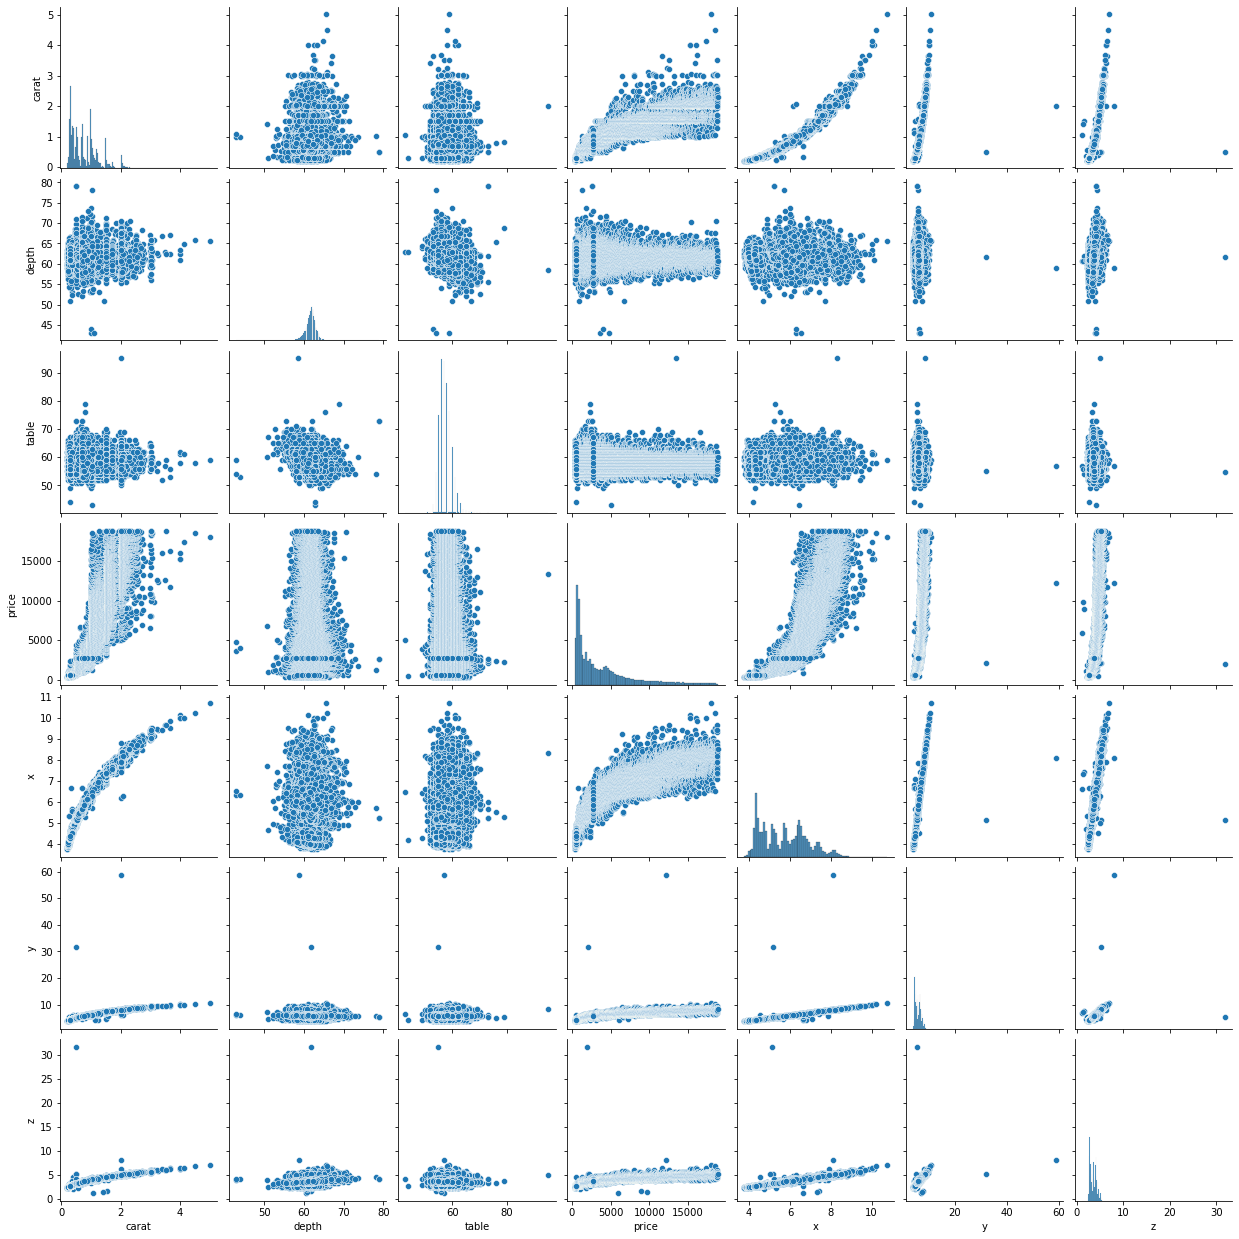

In [58]:
sns.pairplot(df)

<AxesSubplot:xlabel='price', ylabel='y'>

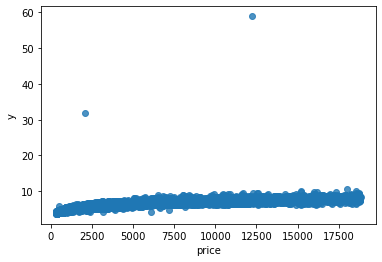

In [59]:
sns.regplot(x='price',y='y',data=df)

<AxesSubplot:xlabel='price', ylabel='z'>

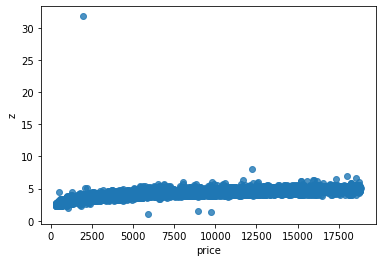

In [60]:
sns.regplot(x='price',y='z',data=df)

<AxesSubplot:xlabel='price', ylabel='table'>

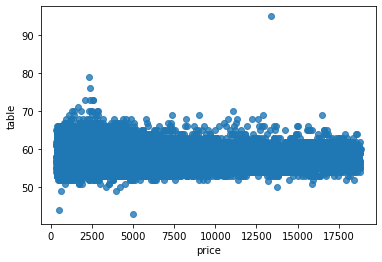

In [61]:
sns.regplot(x='price',y='table',data=df)

<AxesSubplot:xlabel='price', ylabel='depth'>

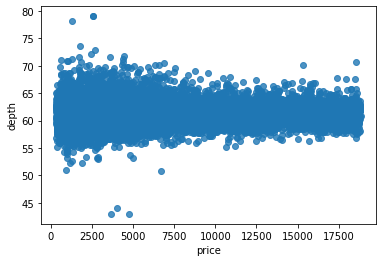

In [62]:
sns.regplot(x='price',y='depth',data=df)

<AxesSubplot:xlabel='price', ylabel='carat'>

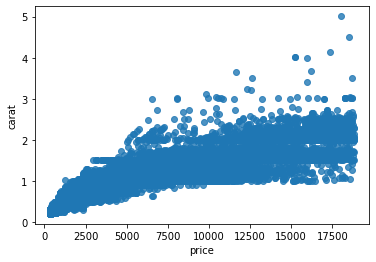

In [63]:
sns.regplot(x='price',y='carat',data=df)

<AxesSubplot:xlabel='price', ylabel='x'>

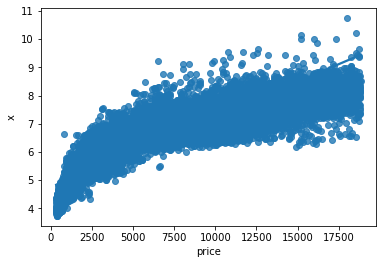

In [64]:
sns.regplot(x='price',y='x',data=df)

In [65]:
df=df[(df['depth']<75)&(df['depth']>45)]
df=df[(df['table']<80)&(df['table']>40)]
df=df[(df['y']<30)]
df=df[(df['z']<30)&(df['z']>2)]
df.shape

(53907, 10)

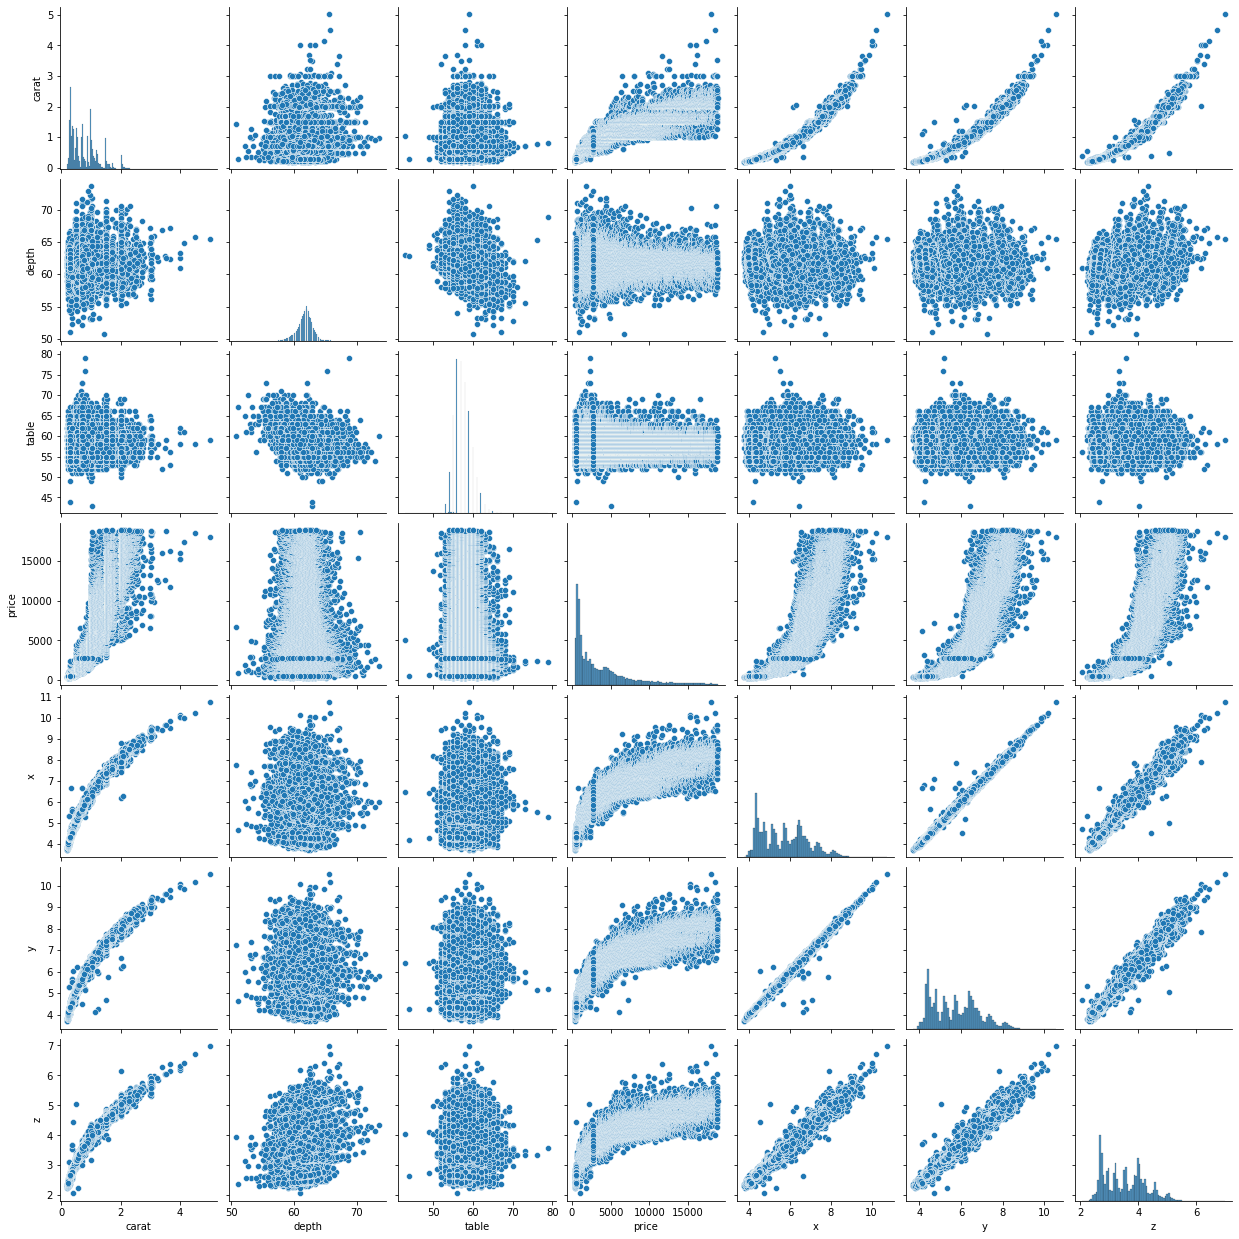

In [66]:
sns.pairplot(df)

<AxesSubplot:xlabel='price', ylabel='y'>

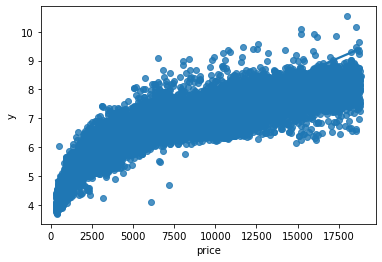

In [67]:
sns.regplot(x='price',y='y',data=df)

<AxesSubplot:xlabel='price', ylabel='z'>

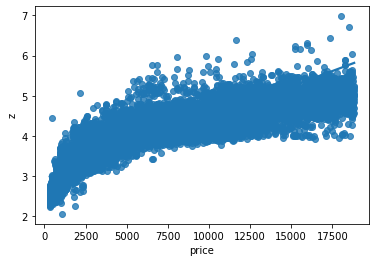

In [68]:
sns.regplot(x='price',y='z',data=df)

<AxesSubplot:xlabel='price', ylabel='table'>

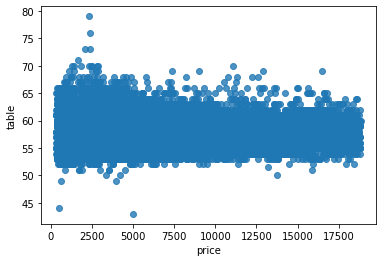

In [69]:
sns.regplot(x='price',y='table',data=df)

<AxesSubplot:xlabel='price', ylabel='depth'>

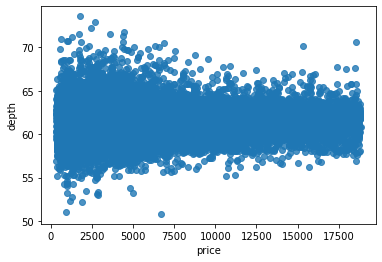

In [70]:
sns.regplot(x='price',y='depth',data=df)

In [71]:
df.shape

(53907, 10)

In [72]:
cut_map = {'Fair':0,'Good':1,'Very Good':2,'Premium':3,'Ideal':4}
df['cut'] = [cut_map.get(item) for item in df['cut']]

color_map = {'J':0,'I':1,'H':2,'G':3,'F':4,'E':5,'D':6}
df['color'] = [color_map.get(item) for item in df['color']]

clar_map = {'I1':0,'SI2':1,'SI1':2,'VS2':3,'VS1':4,'VVS2':5,'VVS1':6,'IF':7}
df['clarity'] = [clar_map.get(item) for item in df['clarity']]

In [73]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,5,1,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,5,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,5,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,1,3,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,0,1,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,4,6,2,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,1,6,2,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,2,6,2,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,3,2,1,61.0,58.0,2757,6.15,6.12,3.74


In [117]:
import seaborn as sns

<AxesSubplot:>

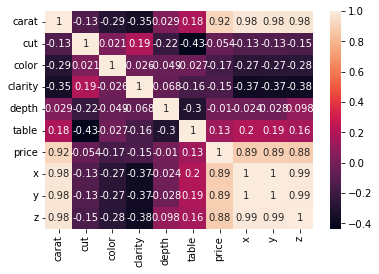

In [119]:
sns.heatmap(df.corr(),annot=True)

In [120]:
x=df.drop('price',axis=1)
x

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,4,5,1,61.5,55.0,3.95,3.98,2.43
1,0.21,3,5,2,59.8,61.0,3.89,3.84,2.31
2,0.23,1,5,4,56.9,65.0,4.05,4.07,2.31
3,0.29,3,1,3,62.4,58.0,4.20,4.23,2.63
4,0.31,1,0,1,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...
53935,0.72,4,6,2,60.8,57.0,5.75,5.76,3.50
53936,0.72,1,6,2,63.1,55.0,5.69,5.75,3.61
53937,0.70,2,6,2,62.8,60.0,5.66,5.68,3.56
53938,0.86,3,2,1,61.0,58.0,6.15,6.12,3.74


In [121]:
y=df['price']
y

0         326
1         326
2         327
3         334
4         335
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 53907, dtype: int64

In [122]:
from sklearn.model_selection import train_test_split

In [123]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)
x_train,x_test,y_train,y_test

(       carat  cut  color  clarity  depth  table     x     y     z
 11326   1.18    3      3        1   60.5   60.0  6.88  6.81  4.14
 50422   0.70    4      4        1   62.0   55.0  5.69  5.73  3.54
 37928   0.30    2      2        1   63.2   55.0  4.29  4.26  2.70
 477     0.71    4      3        4   62.9   58.0  5.66  5.69  3.57
 36990   0.33    4      4        6   61.5   56.0  4.46  4.49  2.75
 ...      ...  ...    ...      ...    ...    ...   ...   ...   ...
 44592   0.53    4      2        4   61.7   56.0  5.22  5.18  3.21
 30305   0.41    2      5        2   60.4   58.0  4.75  4.79  2.88
 6643    0.90    4      5        1   62.7   54.0  6.13  6.21  3.87
 35368   0.38    3      4        2   60.4   58.0  4.72  4.68  2.84
 23735   2.01    2      2        1   63.4   60.0  7.97  7.89  5.03
 
 [37734 rows x 9 columns],
        carat  cut  color  clarity  depth  table     x     y     z
 19239   1.07    2      3        5   62.8   57.0  6.46  6.56  4.09
 188     0.71    2      4        

In [124]:
x_train

,carat,cut,color,clarity,depth,table,x,y,z
11326,1.18,3,3,1,60.5,60.0,6.88,6.81,4.14
50422,0.70,4,4,1,62.0,55.0,5.69,5.73,3.54
37928,0.30,2,2,1,63.2,55.0,4.29,4.26,2.70
477,0.71,4,3,4,62.9,58.0,5.66,5.69,3.57
36990,0.33,4,4,6,61.5,56.0,4.46,4.49,2.75
...,...,...,...,...,...,...,...,...,...
44592,0.53,4,2,4,61.7,56.0,5.22,5.18,3.21
30305,0.41,2,5,2,60.4,58.0,4.75,4.79,2.88
6643,0.90,4,5,1,62.7,54.0,6.13,6.21,3.87
35368,0.38,3,4,2,60.4,58.0,4.72,4.68,2.84


In [125]:
x_test

,carat,cut,color,clarity,depth,table,x,y,z
19239,1.07,2,3,5,62.8,57.0,6.46,6.56,4.09
188,0.71,2,4,3,62.8,57.0,5.64,5.69,3.56
44914,0.53,3,6,2,61.0,58.0,5.18,5.22,3.17
2247,0.91,1,3,1,62.5,60.0,6.05,6.08,3.79
8269,0.90,2,6,2,61.5,58.0,6.15,6.21,3.80
...,...,...,...,...,...,...,...,...,...
7062,0.33,2,3,3,62.0,58.0,4.42,4.45,2.75
41377,0.53,4,4,1,60.9,55.0,5.26,5.29,3.21
1689,0.76,4,5,2,62.5,57.0,5.80,5.82,3.63
48220,0.57,4,3,4,62.1,56.0,5.33,5.30,3.30


In [126]:
y_train

11326     4988
50422     2259
37928      485
477       2820
36990      964
         ...  
44592     1607
30305      725
6643      4091
35368      898
23735    11780
Name: price, Length: 37734, dtype: int64

In [127]:
y_test

19239    7975
188      2777
44914    1631
2247     3149
8269     4381
         ... 
7062      579
41377    1220
1689     3033
48220    1949
51429    2373
Name: price, Length: 16173, dtype: int64

In [128]:
from sklearn.linear_model import LinearRegression

In [129]:
lr=LinearRegression()

In [130]:
lr.fit(x_train,y_train)

LinearRegression()

In [131]:
y_pred=lr.predict(x_test)
y_pred

array([6995.10522224, 3114.14512845, 1940.00813953, ..., 3587.43084988,
       2248.81718028, 3335.56411722])

In [132]:
from sklearn.metrics import r2_score

In [133]:
r2score=r2_score(y_test,y_pred)
r2score

0.9088269846631265

In [144]:
from sklearn.tree import DecisionTreeRegressor

In [149]:
dtr = DecisionTreeRegressor()

In [150]:
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [151]:
y_pred_dtr=dtr.predict(x_test)
y_pred_dtr

array([7695., 3146., 2021., ..., 3453., 1884., 2278.])

In [152]:
r2score1=r2_score(y_test,y_pred_dtr)
r2score1

0.9666960992224971

In [153]:
from sklearn.ensemble import RandomForestRegressor

In [154]:
rf=RandomForestRegressor()

In [155]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [156]:
y_pred_rf=rf.predict(x_test)
y_pred_rf

array([7840.07, 2808.28, 1664.13, ..., 2913.84, 1903.19, 2258.64])

In [157]:
r2score2=r2_score(y_test,y_pred_rf)
r2score2

0.9811034893764559

In [114]:
import pickle

In [158]:
filename='diamond_price_prediction'
pickle.dump(lr,open(filename,'wb'))



In [159]:
loaded_model=pickle.load(open(filename,'rb'))
loaded_model.predict(x_test)

array([6995.10522224, 3114.14512845, 1940.00813953, ..., 3587.43084988,
       2248.81718028, 3335.56411722])